In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
df=pd.read_csv('E:\XREA_Project_Documents\indexing-application-main\Data\indices.csv')
df

,city,Best_Value_Index,CWYK_Index,Retiree_Index,YP_Index
0,"Abilene city, Texas",0.901207,0.851076,0.866168,0.962503
1,"Addison village, Illinois",0.775693,0.757069,0.787693,0.806168
2,"Alafaya CDP, Florida",0.871782,0.887348,0.823137,0.930423
3,"Algonquin village, Illinois",0.857186,0.816892,0.830228,0.818418
4,"Allen city, Texas",0.875983,0.885058,0.848536,0.863848
...,...,...,...,...,...
491,"Woodstock city, Illinois",0.851158,0.811257,0.792950,0.877531
492,"Wright CDP, Florida",0.850223,0.834810,0.789313,0.914090
493,"Wylie city, Texas",0.883945,0.880463,0.812412,0.927621
494,"Yuma city, Arizona",0.819254,0.757194,0.759705,0.828967


Text(0, 0.5, 'Couples with Young Kids')

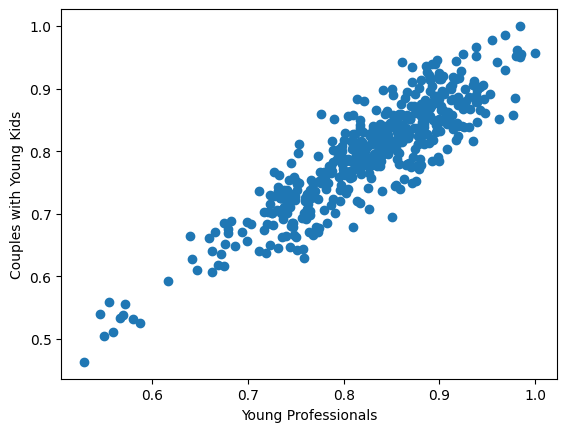

In [3]:
# Quick statistical and visual understanding of the data before implementation of the algorithm

# Scatter Diagram with Young Professionals and Couples with Young Kids
plt.scatter(df["YP_Index"], 
            df["CWYK_Index"])

plt.xlabel("Young Professionals")
plt.ylabel("Couples with Young Kids")

Text(0, 0.5, 'Retirees')

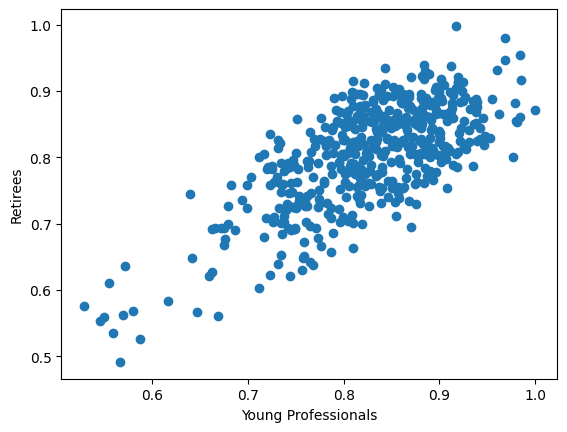

In [4]:
# Scatter Diagram with Young Professionals and Retirees
plt.scatter(df["YP_Index"], 
            df["Retiree_Index"])

plt.xlabel("Young Professionals")
plt.ylabel("Retirees")


In [7]:
df1=df.drop(['city'],axis=1)

In [8]:
df1

,Best_Value_Index,CWYK_Index,Retiree_Index,YP_Index
0,0.901207,0.851076,0.866168,0.962503
1,0.775693,0.757069,0.787693,0.806168
2,0.871782,0.887348,0.823137,0.930423
3,0.857186,0.816892,0.830228,0.818418
4,0.875983,0.885058,0.848536,0.863848
...,...,...,...,...
491,0.851158,0.811257,0.792950,0.877531
492,0.850223,0.834810,0.789313,0.914090
493,0.883945,0.880463,0.812412,0.927621
494,0.819254,0.757194,0.759705,0.828967


In [9]:
# We are going to consider a heuristic approach called Elbow method -- the one of the widely 
# used to find the optimal number of clusters

# The first helper function creates for each value of K the corresponding KMeans model and saves 
# its inertia along with the actual K value

def find_best_clusters(input_data_frame, max_K):
    
    clusters_centers = []
    k_values = []
    
    for cluster_index in range(1, max_K):
        
        kmeans_model = KMeans(n_clusters = cluster_index)
        kmeans_model.fit(input_data_frame)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(cluster_index)
        
    
    return clusters_centers, k_values

In [10]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

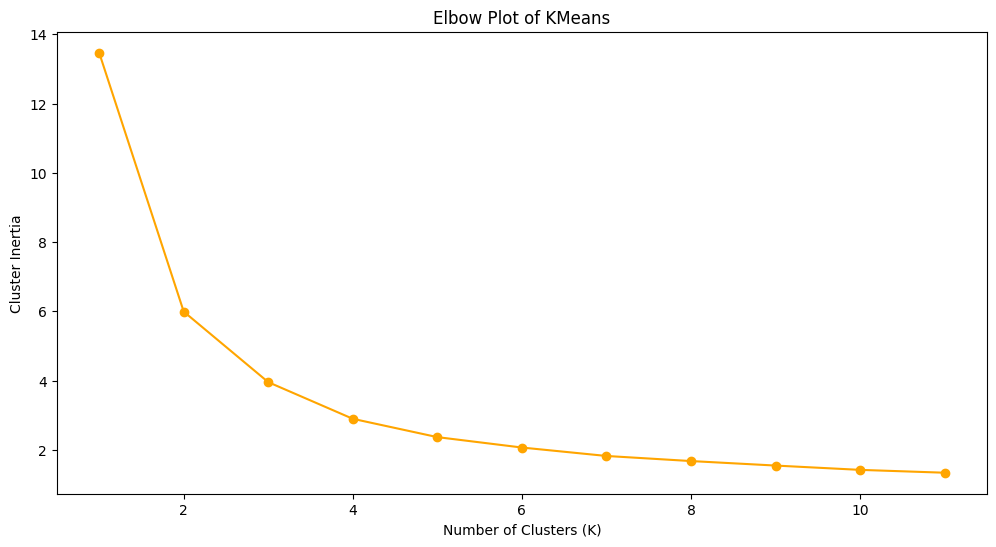

In [11]:
clusters_centers, k_values = find_best_clusters(df1, 12)
generate_elbow_plot(clusters_centers, k_values)

In [12]:
# Once we have determined the optimal number of clusters from the Elbow plot, we can 
# finally apply the KMeans model to that value
# The variable optimum_cluster_no is determined from the elbow plot

kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(df1)
df["clusters"] = kmeans_model.labels_


In [13]:
df

,city,Best_Value_Index,CWYK_Index,Retiree_Index,YP_Index,clusters
0,"Abilene city, Texas",0.901207,0.851076,0.866168,0.962503,0
1,"Addison village, Illinois",0.775693,0.757069,0.787693,0.806168,2
2,"Alafaya CDP, Florida",0.871782,0.887348,0.823137,0.930423,0
3,"Algonquin village, Illinois",0.857186,0.816892,0.830228,0.818418,0
4,"Allen city, Texas",0.875983,0.885058,0.848536,0.863848,0
...,...,...,...,...,...,...
491,"Woodstock city, Illinois",0.851158,0.811257,0.792950,0.877531,0
492,"Wright CDP, Florida",0.850223,0.834810,0.789313,0.914090,0
493,"Wylie city, Texas",0.883945,0.880463,0.812412,0.927621,0
494,"Yuma city, Arizona",0.819254,0.757194,0.759705,0.828967,2


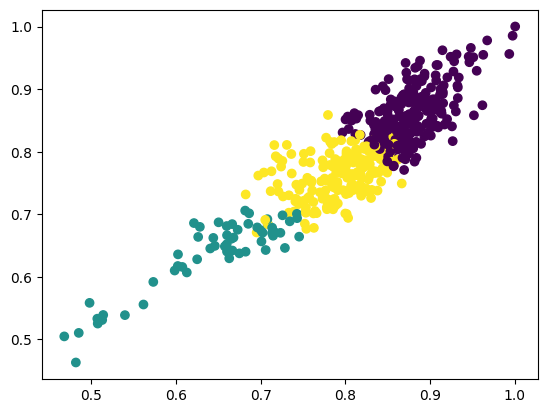

In [14]:
plt.scatter(df["Best_Value_Index"], 
            df["CWYK_Index"], 
            c = df["clusters"])


In [15]:
df_cluster0=df[df['clusters']==0]
df_cluster1=df[df['clusters']==1]
df_cluster2=df[df['clusters']==2]


In [16]:
df_cluster0

,city,Best_Value_Index,CWYK_Index,Retiree_Index,YP_Index,clusters
0,"Abilene city, Texas",0.901207,0.851076,0.866168,0.962503,0
2,"Alafaya CDP, Florida",0.871782,0.887348,0.823137,0.930423,0
3,"Algonquin village, Illinois",0.857186,0.816892,0.830228,0.818418,0
4,"Allen city, Texas",0.875983,0.885058,0.848536,0.863848,0
5,"Altamonte Springs city, Florida",0.844595,0.811734,0.805553,0.884311,0
...,...,...,...,...,...,...
489,"Winter Springs city, Florida",0.857315,0.839300,0.863995,0.884121,0
490,"Woodridge village, Illinois",0.853787,0.848967,0.813545,0.909059,0
491,"Woodstock city, Illinois",0.851158,0.811257,0.792950,0.877531,0
492,"Wright CDP, Florida",0.850223,0.834810,0.789313,0.914090,0


In [17]:
df_cluster0['Best_Value_Index'].mean()

0.8784706903188689

In [18]:
df_cluster0['CWYK_Index'].mean()

0.8600667319457965

In [19]:
df_cluster0['Retiree_Index'].mean()

0.8586792582648216

In [20]:
df_cluster0['YP_Index'].mean()

0.8833979200376729

In [21]:
df_cluster1['Best_Value_Index'].mean()

0.6447326513200287

In [22]:
df_cluster1['CWYK_Index'].mean()

0.6379595006803571

In [23]:
df_cluster1['Retiree_Index'].mean()

0.661171102340575

In [24]:
df_cluster1['YP_Index'].mean()

0.6863904412428519

In [25]:
df_cluster2['Best_Value_Index'].mean()

0.7944440229249597

In [26]:
df_cluster2['CWYK_Index'].mean()

0.7627017587304457

In [27]:
df_cluster2['Retiree_Index'].mean()

0.7798819573425207

In [28]:
df_cluster2['YP_Index'].mean()

0.7961909554237612

In [29]:
len(df_cluster1)

58

In [30]:
df_cluster2

,city,Best_Value_Index,CWYK_Index,Retiree_Index,YP_Index,clusters
1,"Addison village, Illinois",0.775693,0.757069,0.787693,0.806168,2
6,"Alton city, Illinois",0.841474,0.788140,0.805556,0.801288,2
10,"Apache Junction city, Arizona",0.799984,0.701263,0.784745,0.740550,2
14,"Arlington city, Texas",0.806911,0.795784,0.783437,0.812881,2
17,"Austin city, Texas",0.785879,0.775884,0.774323,0.875733,2
...,...,...,...,...,...,...
481,"Weston city, Florida",0.730987,0.810927,0.742013,0.753252,2
485,"Wilmette village, Illinois",0.779549,0.858791,0.859505,0.776794,2
488,"Winter Park city, Florida",0.782184,0.815736,0.860703,0.837614,2
494,"Yuma city, Arizona",0.819254,0.757194,0.759705,0.828967,2


In [ ]:
silhouette_avg.append(silhouette_score(data_frame, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,’bx-’)

In [ ]:
silhouette_score_average = silhouette_score(df_scaled, model.predict(df_scaled))

In [36]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = {}

from sklearn.metrics import silhouette_score

for num_clusters in range_n_clusters:
    #initialise kmeans
    kmeans_n = KMeans(n_clusters=num_clusters)
    
    preds = kmeans_n.fit_predict(df1)
    centers = kmeans_n.cluster_centers_
    
    #cluster_labels = kmeans.labels_
    score = silhouette_score(df1, preds)
    #print("For n_clusters = {}, silhouette score is {})".format(num_clusters, score))
    
    
    # silhouette score
    silhouette_avg[num_clusters] = score
    
print(silhouette_avg)

{2: 0.5038093533569631, 3: 0.3943163939125196, 4: 0.35832253562833033, 5: 0.3099231542290066, 6: 0.27988271011836724, 7: 0.27702820383085397, 8: 0.2637846737281404}


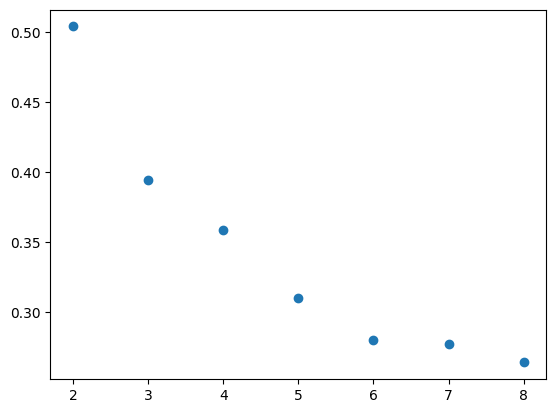

In [42]:
plt.scatter(list(silhouette_avg.keys()), 
            list(silhouette_avg.values()))

In [39]:
list(silhouette_avg.keys())

[2, 3, 4, 5, 6, 7, 8]